In [2]:
import tensorflow as tf
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [3]:
#Generate some house sizes between 1000 and 3500(typically sql ft of house)

num_house = 160
np.random.seed(42)
house_size = np.random.randint(low=1000 , high = 3500, size = num_house)

#Generate the price of the houses

np.random.seed(42)
house_price = house_size * 100.0 + np.random.randint(low=20000,high=70000,size=num_house)

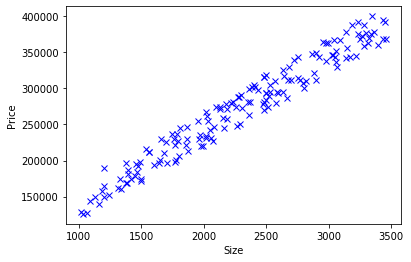

In [4]:
plt.plot(house_size, house_price,"bx")
plt.ylabel("Price")
plt.xlabel("Size")
plt.show()

In [5]:
def normalize(array):
    return (array - array.mean()) / array.std()

In [6]:
num_train_samples = math.floor(num_house * 0.7)

#Define training data
train_house_size = np.asarray(house_size[:num_train_samples])
train_price = np.asarray(house_price[:num_train_samples])

train_house_size_norm = normalize(train_house_size)
train_price_norm = normalize(train_price)

In [7]:
#Define the  test data
test_house_size = np.asarray(house_size[num_train_samples:])
test_price = np.asarray(house_price[num_train_samples:])

test_house_size_norm = normalize(test_house_size)
test_price_norm = normalize(test_price)

In [8]:
# Set up the Tensorflow placeholder that gets updated as we descend down the gradient
tf_house_size = tf.placeholder("float",name="house_size")
tf_price = tf.placeholder("float", name="price")

In [9]:
# Define the sizefactor and priceoffset
tf_size_factor = tf.Variable(np.random.randn(), name = "size_factor")
tf_price_offset = tf.Variable(np.random.randn(), name="price_offset")

Instructions for updating:
Colocations handled automatically by placer.


In [10]:
# Inference Function
tf_price_pred = tf.add(tf.multiply(tf_size_factor,tf_house_size),tf_price_offset)

In [11]:
# Define  the loss function Mean Square Error
tf_cost = tf.reduce_sum(tf.pow(tf_price_pred - tf_price,2))/(2*num_train_samples)

In [12]:
# Define the learning rate
learning_rate = 0.15

In [13]:
# Define a gradient descent optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(tf_cost)

Instructions for updating:
Use tf.cast instead.


In [14]:
# Initialize the variable
init = tf.global_variables_initializer()

iteration #: 0002 cost= 0.592666388 size_factor= 0.17673746 price_offset= -0.7073299
iteration #: 0004 cost= 0.333816171 size_factor= 0.38552403 price_offset= -0.52366424
iteration #: 0006 cost= 0.191974744 size_factor= 0.54010797 price_offset= -0.38765335
iteration #: 0008 cost= 0.114265464 size_factor= 0.6545607 price_offset= -0.28693238
iteration #: 0010 cost= 0.071702942 size_factor= 0.73930025 price_offset= -0.21234456
iteration #: 0012 cost= 0.048399203 size_factor= 0.8020405 price_offset= -0.15710945
iteration #: 0014 cost= 0.035646107 size_factor= 0.8484934 price_offset= -0.11620593
iteration #: 0016 cost= 0.028671529 size_factor= 0.8828869 price_offset= -0.08591527
iteration #: 0018 cost= 0.024860596 size_factor= 0.9083517 price_offset= -0.06348391
iteration #: 0020 cost= 0.022780856 size_factor= 0.9272053 price_offset= -0.046872646
iteration #: 0022 cost= 0.021647755 size_factor= 0.94116414 price_offset= -0.03457141
iteration #: 0024 cost= 0.021031799 size_factor= 0.9514992 p

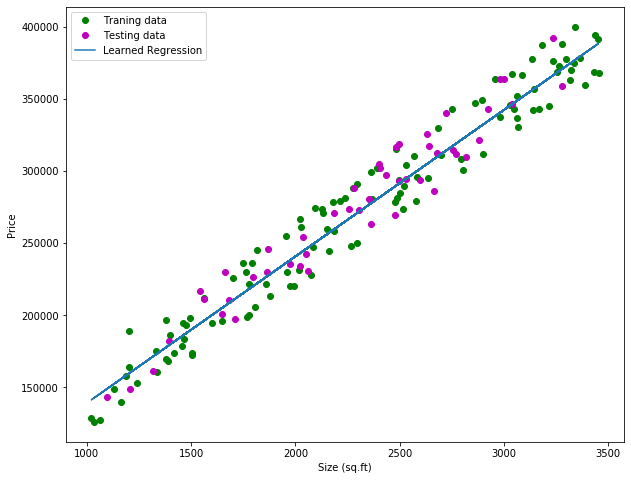

In [16]:
with tf.Session() as sess:
    sess.run(init)
    display_every = 2
    num_training_iter = 30
    
    fit_num_plot = math.floor(num_training_iter/display_every)
    
    fit_size_factor = np.zeros(fit_num_plot)
    fit_price_offset = np.zeros(fit_num_plot)
    fit_plot_idx = 0
    for iteration in range(num_training_iter):
        # Fit all the training data
        for (x,y) in zip(train_house_size_norm,train_price_norm):
            sess.run(optimizer,feed_dict={tf_house_size:x,tf_price:y})
        
        #Display the current status
        if (iteration + 1) % display_every == 0:
            c = sess.run(tf_cost, feed_dict={tf_house_size:train_house_size_norm, tf_price:train_price_norm})
            print("iteration #:", '%04d' % (iteration + 1), "cost=", "{:.9f}".format(c),"size_factor=",
                  sess.run(tf_size_factor),"price_offset=",sess.run(tf_price_offset))
            fit_size_factor[fit_plot_idx] = sess.run(tf_size_factor)
            fit_price_offset[fit_plot_idx] = sess.run(tf_price_offset)
            fit_plot_idx = fit_plot_idx + 1
    
    print("Optimization Finished")
    training_cost = sess.run(tf_cost, feed_dict={tf_house_size:train_house_size_norm, tf_price:train_price_norm})
    print("Training Cost=", training_cost,"size_factor=",
                  sess.run(tf_size_factor),"price_offset=",sess.run(tf_price_offset))
    
    train_house_size_mean = train_house_size.mean()
    train_house_size_std = train_house_size.std()

    train_price_mean = train_price.mean()
    train_price_std = train_price.std()

    #Plot the graph

    plt.rcParams["figure.figsize"] = (10,8)
    plt.figure()
    plt.ylabel("Price")
    plt.xlabel("Size (sq.ft)")
    plt.plot(train_house_size,train_price,"go",label="Traning data")
    plt.plot(test_house_size, test_price,"mo", label="Testing data")
    plt.plot(train_house_size_norm * train_house_size_std + train_house_size_mean,
            (sess.run(tf_size_factor) * train_house_size_norm + sess.run(tf_price_offset)) * train_price_std + train_price_mean,
            label = 'Learned Regression')
    plt.legend(loc="upper left")
    plt.show()
    